# HW1

In [1]:
import os
import numpy as np
from astropy.io import fits, ascii
from matplotlib import pyplot
%matplotlib inline

## Problem 1

In [2]:
data_dir = '/Users/abostroem/Desktop/davis/phys266_data_analysis/data/'
flist = ['bias1.fits', 'bias2.fits', 'bias3.fits']

#### Find the mean and std for each file

In [3]:
for ifile in flist:
    print ifile
    img = fits.open(os.path.join(data_dir, ifile))
    #img.info()
    img_data = img[0].data
    print '\tmean = {}'.format(img_data.mean())
    print '\t standard deviation = {}'.format(img_data.std())

bias1.fits
	mean = 1912.46989036
	 standard deviation = 6.0187110314
bias2.fits
	mean = 1912.07039928
	 standard deviation = 5.94588189587
bias3.fits
	mean = 1911.67741346
	 standard deviation = 5.06515593452


#### Find the mean and std for combined array

In [4]:
img1 = fits.getdata(os.path.join(data_dir, flist[0]), 0)
img2 = fits.getdata(os.path.join(data_dir, flist[1]), 0)
img3 = fits.getdata(os.path.join(data_dir, flist[2]), 0)

stacked_img = np.dstack((img1, img2, img3))
mean_img =  np.mean(stacked_img, axis = 2)
print 'mean = {}'.format(mean_img.mean())
print 'standard deviation = {}'.format(mean_img.std())

mean = 1912.0725677
standard deviation = 3.30636090762


## Problem 2

In [6]:
#Load the data
i = np.loadtxt(os.path.join(data_dir, '1608_p60_comb_i.cat'), usecols = [9])
r = np.loadtxt(os.path.join(data_dir, '1608_p60_comb_r.cat'), usecols = [9])

In [7]:
#Eliminate bad data from both arrays
i_clean = i[(i<50)&(r<50)]
r_clean = r[(i<50)&(r<50)]
i_bright = i[(r<22)]
r_bright = r[r<22]

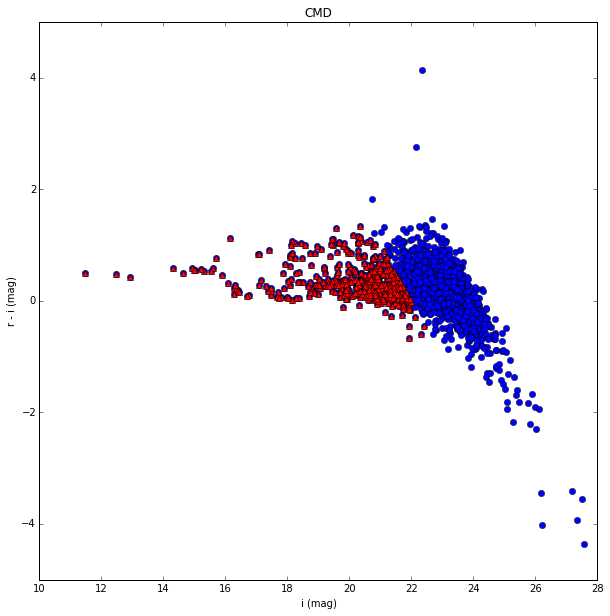

In [11]:
pyplot.figure(figsize = [10, 10])
pyplot.plot(i_clean, r_clean-i_clean, 'bo')
pyplot.plot(i_bright, r_bright - i_bright, 'r^')
pyplot.title('CMD')
pyplot.xlabel('i (mag)')
pyplot.ylabel('r - i (mag)')
